In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rcParams
plt.rcParams["font.family"] = "MS Gothic"
plt.rcParams["font.size"] = 20

In [2]:
# グラフAのeq_detaパス
a_path = r"C:\Users\00220401626\Desktop\Data_1\Output\4\20230207_1748 2300002-000-027.csv"
# グラフBのeq_detaパス  
b_path = r"C:\Users\00220401626\Desktop\Data_1\Output\4\20230207_1402 2300002-000-012.csv"
# グラフCのeq_detaパス
c_path = r"C:\Users\00220401626\Desktop\Data_1\Output\4\20230207_1702 2300002-000-025.csv"

OK = 'ドレ直後'
Nomal = 'Normal'
NG = 'ドレ直前'

# 読み込み～加工
da = pd.read_csv(a_path,encoding="cp932")
db = pd.read_csv(b_path,encoding="cp932")
dc = pd.read_csv(c_path,encoding="cp932")

step = 1
da_selected = da.loc[::step]
db_selected = db.loc[::step]
dc_selected = dc.loc[::step]

# データの生成
a_data = da_selected["Z軸_TCMD(%)"].tolist()
b_data = db_selected["Z軸_TCMD(%)"].tolist()
c_data = dc_selected["Z軸_TCMD(%)"].tolist()


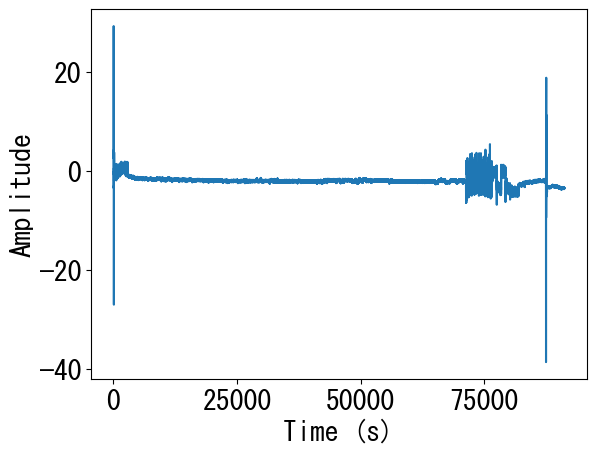

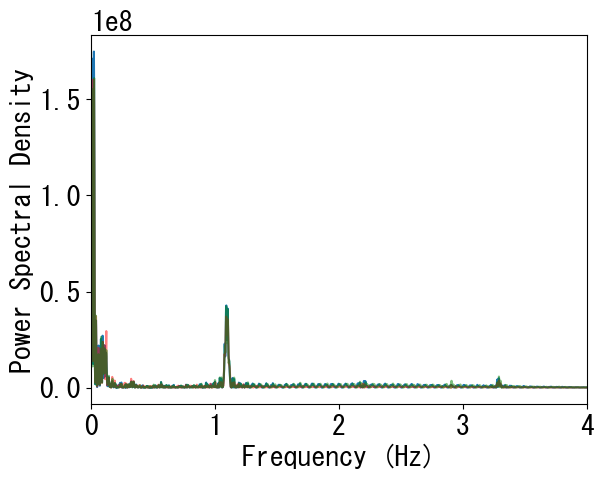

In [3]:
# データのプロット
plt.plot(a_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# フーリエ変換
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')

fft_a_data = np.fft.fft(a_data)
freq_a_data = np.fft.fftfreq(len(a_data), d=1/200)

fft_b_data = np.fft.fft(b_data)
freq_b_data = np.fft.fftfreq(len(b_data), d=1/200)

fft_c_data = np.fft.fft(c_data)
freq_c_data = np.fft.fftfreq(len(c_data), d=1/200)

# パワースペクトル密度のプロット
plt.plot(freq_a_data[1:len(a_data)//2], np.abs(fft_a_data[1:len(a_data)//2])**2, alpha=1)
plt.plot(freq_b_data[1:len(b_data)//2], np.abs(fft_b_data[1:len(b_data)//2])**2, alpha=0.5,color='red')
plt.plot(freq_c_data[1:len(c_data)//2], np.abs(fft_c_data[1:len(c_data)//2])**2, alpha=0.5,color='green')
plt.xlim(0,4)
plt.show()

In [4]:
# フィルター処理
filtered_fft_a_data = np.zeros(len(fft_a_data), dtype=np.complex64)
for i in range(len(freq_a_data)):
    if (freq_a_data[i] > 0 and freq_a_data[i] < 16.8):# | (freq[i] > 0.25 and freq[i] <= 0.5):
        filtered_fft_a_data[i] = fft_a_data[i]

# フーリエ逆変換
filtered_a_data = np.fft.ifft(filtered_fft_a_data)


# フィルター処理
filtered_fft_b_data = np.zeros(len(fft_b_data), dtype=np.complex64)
for i in range(len(freq_b_data)):
    if (freq_b_data[i] > 0 and freq_b_data[i] < 16.8):# | (freq[i] > 0.25 and freq[i] <= 0.5):
        filtered_fft_b_data[i] = fft_b_data[i]

# フーリエ逆変換
filtered_b_data = np.fft.ifft(filtered_fft_b_data)



# フィルター処理
filtered_fft_c_data = np.zeros(len(fft_c_data), dtype=np.complex64)
for i in range(len(freq_c_data)):
    if (freq_c_data[i] > 0 and freq_c_data[i] < 16.8):
        filtered_fft_c_data[i] = fft_c_data[i]

# フーリエ逆変換
filtered_c_data = np.fft.ifft(filtered_fft_c_data)

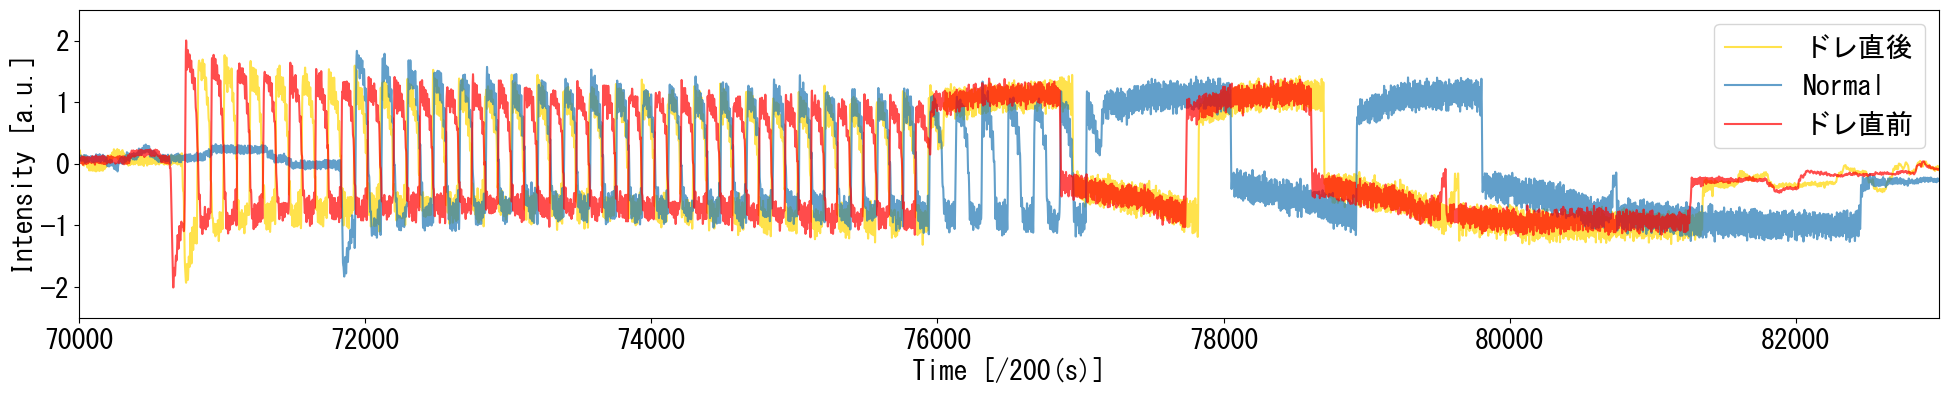

In [5]:
# フィルター処理を行った結果のグラフのプロット
plt.figure(figsize=(24,4))
plt.xlabel("Time [/200(s)]")
plt.ylabel("Intensity [a.u.]")

xa = np.linspace(1,len(a_data),len(a_data))
plt.plot(xa-580, filtered_a_data.real+0.1,label = OK,color = "gold",alpha = 0.7)

xb = np.linspace(1,len(b_data),len(b_data))
plt.plot(xb, filtered_b_data.real+0.13,label = Nomal,alpha = 0.7)

xc = np.linspace(1,len(c_data),len(c_data))
plt.plot(xc-1080, filtered_c_data.real+0.15,label = NG,color = "red",alpha = 0.7)

plt.xlim(70000,83000)
plt.ylim(-2.5,2.5)
# plt.yticks([-0.25,0.00,0.25,0.50,0.75])
plt.legend()
# plt.hlines(0, 0, 83000, colors='black', linestyle='dashed', linewidth=2)
plt.show()

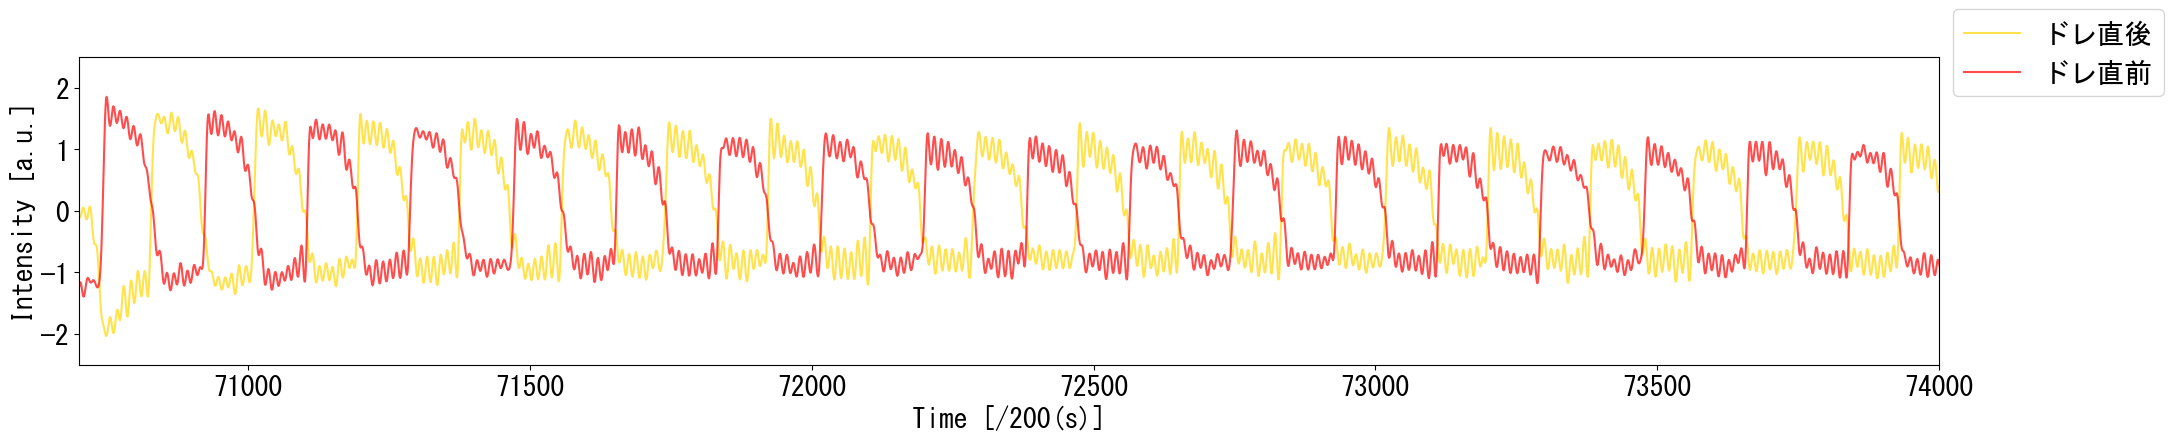

In [6]:
# フィルター処理を行った結果のグラフのプロット
plt.figure(figsize=(24,4))
plt.xlabel("Time [/200(s)]")
plt.ylabel("Intensity [a.u.]")

xa = np.linspace(1,len(a_data),len(a_data))
plt.plot(xa-580, filtered_a_data.real,label = OK,color = "gold",alpha = 0.7)

# xb = np.linspace(1,len(b_data),len(b_data))
# plt.plot(xb, filtered_b_data.real+0.13,label = Nomal,alpha = 0.7)

xc = np.linspace(1,len(c_data),len(c_data))
plt.plot(xc-1080, filtered_c_data.real,label = NG,color = "red",alpha = 0.7)

plt.xlim(70700,74000)
plt.ylim(-2.5,2.5)
# plt.yticks([-0.25,0.00,0.25,0.50,0.75])
plt.legend(bbox_to_anchor=(1.0, 1.0, 0.3, 0.2), loc='upper left')
# plt.hlines(0, 0, 83000, colors='black', linestyle='dashed', linewidth=2)
plt.show()

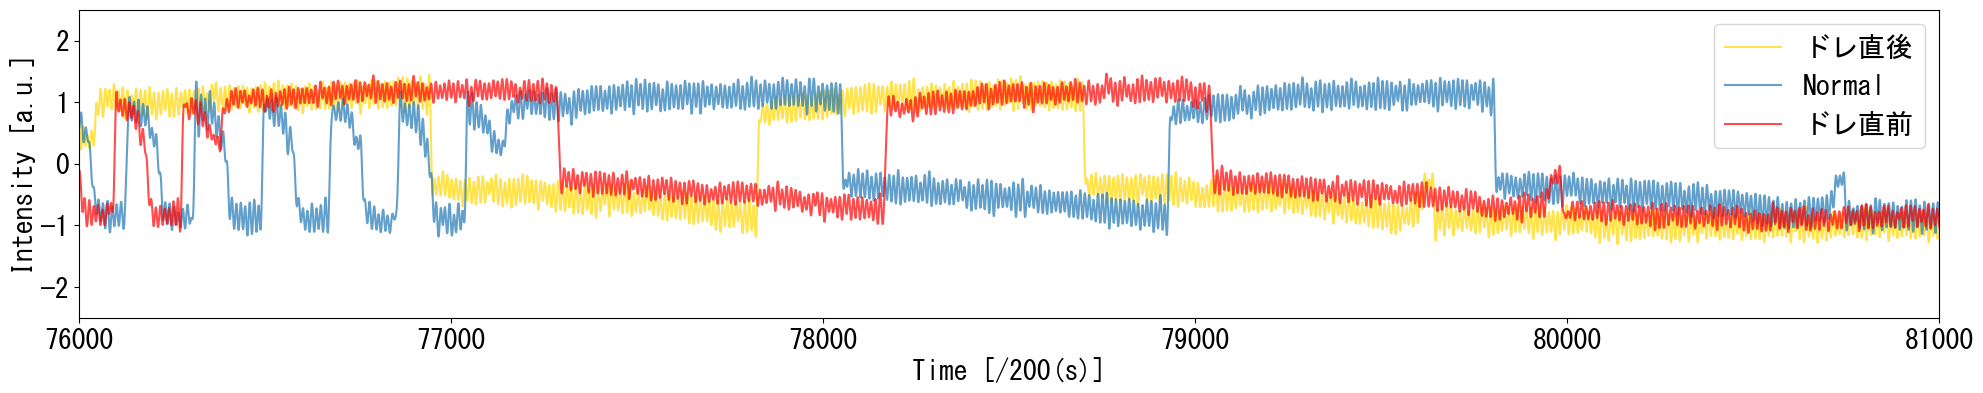

In [11]:
#ロングトラバース
# フィルター処理を行った結果のグラフのプロット
plt.figure(figsize=(24,4))
plt.xlabel("Time [/200(s)]")
plt.ylabel("Intensity [a.u.]")

xa = np.linspace(1,len(a_data),len(a_data))
plt.plot(xa-580, filtered_a_data.real+0.1,label = OK,color = "gold",alpha = 0.7)

xb = np.linspace(1,len(b_data),len(b_data))
plt.plot(xb, filtered_b_data.real+0.13,label = Nomal,alpha = 0.7)

xc = np.linspace(1,len(c_data),len(c_data))
plt.plot(xc-650, filtered_c_data.real+0.2,label = NG,color = "red",alpha = 0.7)

plt.xlim(76000,81000)
plt.ylim(-2.5,2.5)
# plt.yticks([-0.25,0.00,0.25,0.50,0.75])
plt.legend()
# plt.hlines(0, 0, 83000, colors='black', linestyle='dashed', linewidth=2)
plt.show()

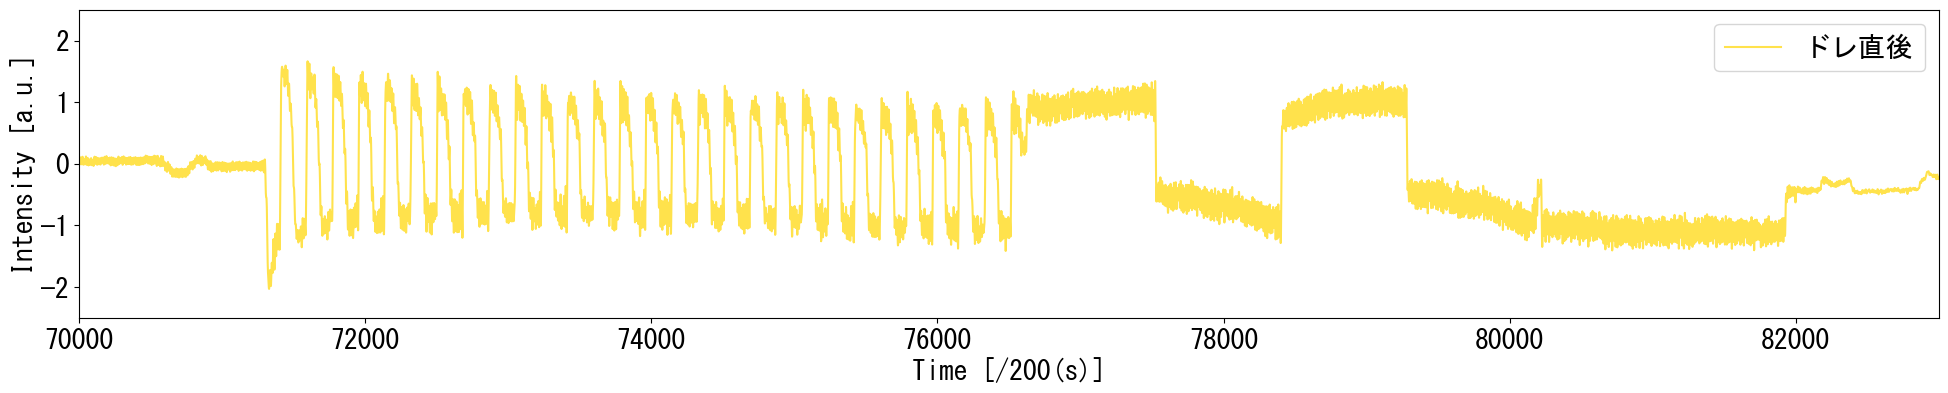

In [8]:
# フィルター処理を行った結果のグラフのプロット
plt.figure(figsize=(24,4))
plt.xlabel("Time [/200(s)]")
plt.ylabel("Intensity [a.u.]")

xa = np.linspace(1,len(a_data),len(a_data))
plt.plot(xa, filtered_a_data.real,label = OK,color = "gold",alpha = 0.7)

plt.xlim(70000,83000)
plt.ylim(-2.5,2.5)
# plt.yticks([-0.25,0.00,0.25,0.50,0.75])
plt.legend()
# plt.hlines(0, 0, 83000, colors='black', linestyle='dashed', linewidth=2)
plt.show()

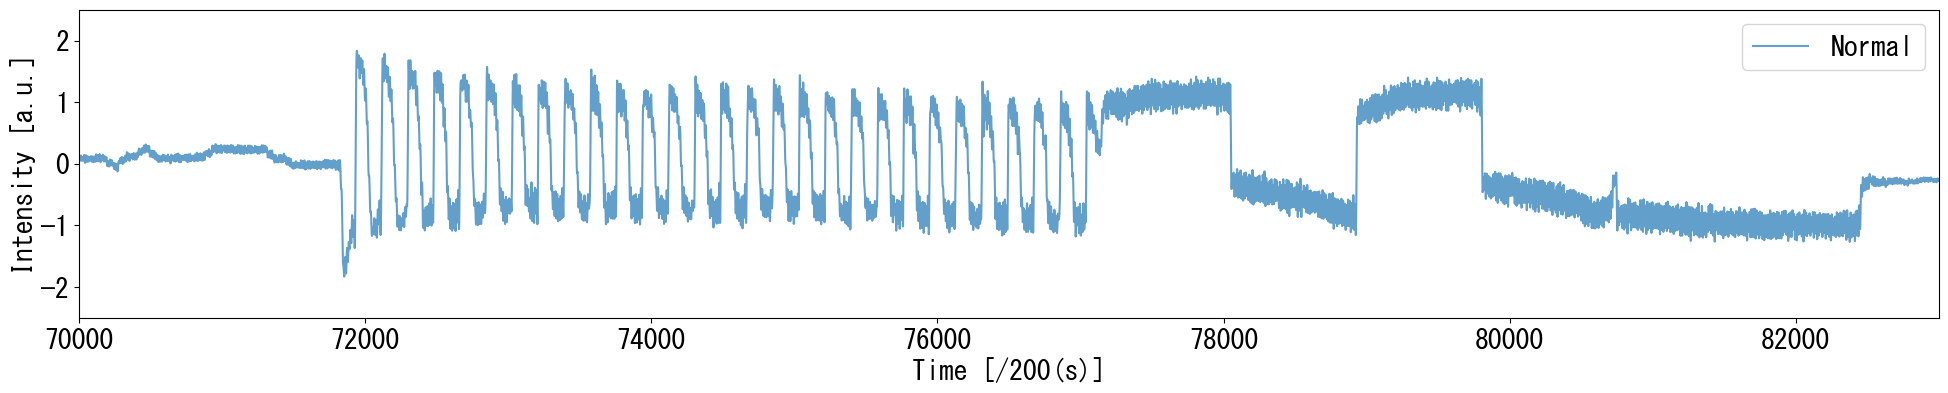

In [9]:
# フィルター処理を行った結果のグラフのプロット
plt.figure(figsize=(24,4))
plt.xlabel("Time [/200(s)]")
plt.ylabel("Intensity [a.u.]")

xb = np.linspace(1,len(b_data),len(b_data))
plt.plot(xb, filtered_b_data.real+0.13,label = Nomal,alpha = 0.7)


plt.xlim(70000,83000)
plt.ylim(-2.5,2.5)
# plt.yticks([-0.25,0.00,0.25,0.50,0.75])
plt.legend()
# plt.hlines(0, 0, 83000, colors='black', linestyle='dashed', linewidth=2)
plt.show()

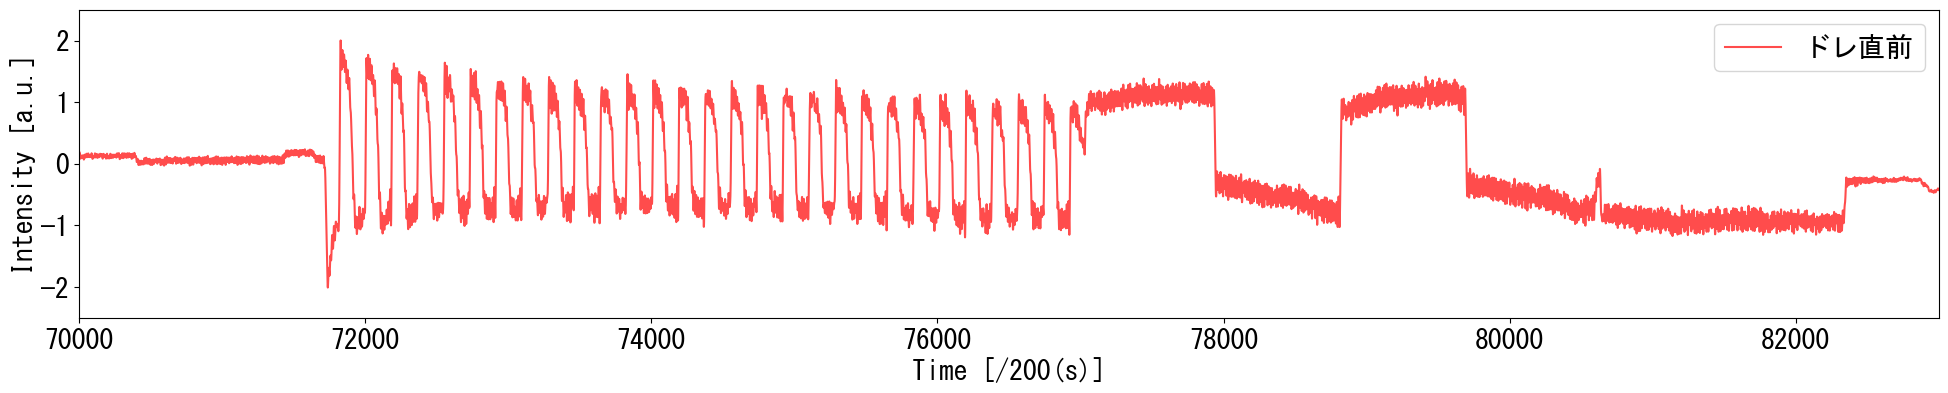

In [10]:
# フィルター処理を行った結果のグラフのプロット
plt.figure(figsize=(24,4))
plt.xlabel("Time [/200(s)]")
plt.ylabel("Intensity [a.u.]")

xc = np.linspace(1,len(c_data),len(c_data))
plt.plot(xc, filtered_c_data.real+0.15,label = NG,color = "red",alpha = 0.7)


plt.xlim(70000,83000)
plt.ylim(-2.5,2.5)
# plt.yticks([-0.25,0.00,0.25,0.50,0.75])
plt.legend()
# plt.hlines(0, 0, 83000, colors='black', linestyle='dashed', linewidth=2)
plt.show()